In [1]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [26]:
class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 5, stride =2, padding = 1),
            nn.ReLU(True),
            nn.MaxPool2d(2, stride =2),
            nn.Conv2d(16, 8, 5, stride = 2, padding = 1),
            nn.ReLU(True),
            nn.MaxPool2d(2, stride=1)
        )
        
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(8, 16, 5, stride =2),
            nn.ReLU(True),
            nn.ConvTranspose2d(16, 8, 7, stride =2, padding = 1),
            nn.ReLU(True),
            nn.ConvTranspose2d(8,1,2, stride = 2, padding =1),
            nn.Tanh()
        )
        
    def forward(self, x):
#         print("before", x.shape)
        x = self.encoder(x)
#         print("after encoder", x.shape)
        x = self.decoder(x)
#         print("after decoder", x.shape)
        return x

In [31]:
num_epochs = 10
batch_size = 120
learning_rate = 1e-3

In [27]:
model = autoencoder()
objective = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate,
                             weight_decay=1e-5)

0 - 0 loss: tensor(0.0074)
0 - 1 loss: tensor(0.0090)
0 - 2 loss: tensor(0.0106)
0 - 3 loss: tensor(0.0074)
0 - 4 loss: tensor(0.0107)
0 - 5 loss: tensor(0.0098)
0 - 6 loss: tensor(0.0092)
0 - 7 loss: tensor(0.0085)
0 - 8 loss: tensor(0.0085)
0 - 9 loss: tensor(0.0075)
0 - 10 loss: tensor(0.0104)
0 - 11 loss: tensor(0.0076)
0 - 12 loss: tensor(0.0088)
0 - 13 loss: tensor(0.0087)
0 - 14 loss: tensor(0.0085)
0 - 15 loss: tensor(0.0109)
0 - 16 loss: tensor(0.0074)
0 - 17 loss: tensor(0.0070)
0 - 18 loss: tensor(0.0100)
0 - 19 loss: tensor(0.0076)
0 - 20 loss: tensor(0.0108)
0 - 21 loss: tensor(0.0089)
0 - 22 loss: tensor(0.0066)
0 - 23 loss: tensor(0.0091)
0 - 24 loss: tensor(0.0094)
0 - 25 loss: tensor(0.0099)
0 - 26 loss: tensor(0.0092)
0 - 27 loss: tensor(0.0076)
0 - 28 loss: tensor(0.0090)
0 - 29 loss: tensor(0.0108)
0 - 30 loss: tensor(0.0094)
0 - 31 loss: tensor(0.0084)
0 - 32 loss: tensor(0.0089)
0 - 33 loss: tensor(0.0089)
0 - 34 loss: tensor(0.0072)
0 - 35 loss: tensor(0.0109)
0 

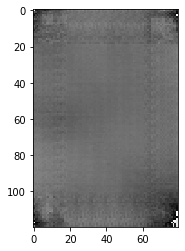

In [50]:
# custom dataloader for .npy file
class numpyDataset(Dataset):
    def __init__(self, data, transform=None):
        self.data = torch.from_numpy(data).float()
        self.targets = torch.from_numpy(data).float()
        self.transform = transform
        self.noise = torch.randn(len(self.data), 1, 120, 80)
        
    def __getitem__(self, index):
        x = self.data[index]
        y = self.targets[index]
        if self.transform:
            x = self.transform(x)
            y = self.transform(y)
        x = x+self.noise[index]
        
        return x, y
#     def __init__(self, data, transform=None):
#         self.data = torch.from_numpy(data).float()
#         self.transform = transform
#         self.noise = torch.randn(len(self.data), 1, 120, 80)
        
#     def __getitem__(self, index):
#         x = self.data[index]
#         if self.transform:
#             x = self.transform(x)
# #         x = x+self.noise[index]
        
#         return x
    
    def __len__(self):
        return len(self.data)


if __name__ == '__main__':

    NUM_EPOCH       = 2
    
    transform       = transforms.Compose([
                                    transforms.ToPILImage(),
                                    transforms.Grayscale(num_output_channels=1),
                                    transforms.ToTensor(),
                                ])

    # for training
    traindata       = np.load('train.npy')
    traindataset    = numpyDataset(traindata, transform)    
    trainloader     = DataLoader(traindataset, batch_size=batch_size, shuffle=False, num_workers=0)
    
    for epoch in range(NUM_EPOCH):
        for batch_idx, (data,target) in enumerate(trainloader):
            image   = data
            image = Variable(image)
            target = Variable(target)

#             to_img  = transforms.ToPILImage()
#             image   = to_img(target[0])
#             plt.imshow(image, cmap='gray')

#             fig     = plt.figure()
#             ax      = fig.add_subplot(1, 1, 1)
#             fig.imshow(image, cmap='gray')
#             print(batch_idx)
#             if batch_idx >15:
#                 break

            '''
            your code for train
            '''
            output = model(image)
            loss = objective(output, target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            print(epoch, "-",batch_idx, "loss:",loss.data)
#         print('epoch [{}/{}], loss:{:.4f}'.format(epoch+1, num_epochs, loss.data[0]))
        if epoch % 2 == 0:
            to_img  = transforms.ToPILImage()
            pic = to_img(output.data[0])
            plt.imshow(pic, cmap = 'gray')
            
            

    # for testing
  
#     testdata        = np.load('test.npy')
#     testdataset     = numpyDataset(testdata, transform)
#     testloader      = DataLoader(testdataset, batch_size=1, shuffle=False, num_workers=2)

#     result_for_submit = None    # this is for submit file

#     for batch_idx, data in enumerate(testloader):

#         result_of_test = data

#         if batch_idx == 0:
#             result_for_submit = result_of_test
#         else:
#             try:
#                 result_for_submit = torch.cat([result_for_submit, result_of_test], dim=0)

#             except RuntimeError:
#                 transposed = torch.transpose(result_of_test, 2, 3)
#                 result_for_submit = torch.cat([result_for_submit, transposed], dim=0)
        
#     # the submit_file.shape must be (400,1,120,80) 
#     submit_file = result_for_submit.detach().numpy()
#     np.save('JeongSeongWoon.npy', submit_file)
